In [1]:
import  numpy  as  np
import  pandas  as  pd
from  ast  import  literal_eval
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

dfWaypoint = pd.read_csv("../data/lake_track_waypoints.csv")
dfNormalLogger = pd.read_csv("../data/normal_logger.csv")
dfDistractedTextingLogger = pd.read_csv("../data/distracted_texting_logger.csv")
dfDistractedEatingLogger = pd.read_csv("../data/distracted_eating_logger.csv")

x_waypoint = []
y_waypoint = []
ool_angle = []
for i in range(0, len(dfWaypoint)): 
    x_waypoint.append(dfWaypoint.loc[i, 'x'])
    y_waypoint.append(dfWaypoint.loc[i, 'y'])

x_goodPath = []
y_goodPath = []
x_badPath = []
y_badPath = []
x_badPath2 = []
y_badPath2 = []
dfNormalLogger = dfNormalLogger[:len(dfDistractedTextingLogger)]
dfDistractedEatingLogger = dfDistractedEatingLogger[:len(dfDistractedTextingLogger)]
for i in range(0, len(dfNormalLogger) - 1): 
    x_goodPath.append(dfNormalLogger.loc[i, 'x'])
    y_goodPath.append(dfNormalLogger.loc[i, 'y'])
    x_badPath.append(dfDistractedTextingLogger.loc[i, 'x'])
    y_badPath.append(dfDistractedTextingLogger.loc[i, 'y'])
    x_badPath2.append(dfDistractedEatingLogger.loc[i, 'x'])
    y_badPath2.append(dfDistractedEatingLogger.loc[i, 'y'])

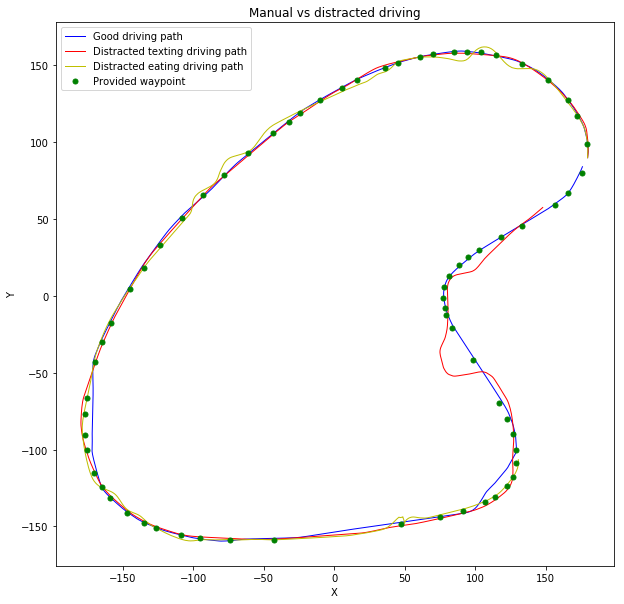

In [14]:
plt.rcParams["figure.figsize"] = [10, 10]
p1 = plt.plot(x_goodPath, y_goodPath, 'b', lw=1.0)
p2 = plt.plot(x_badPath, y_badPath, 'r', lw=1.0)
p3 = plt.plot(x_badPath2, y_badPath2, 'y', lw=1.0)
p4 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Manual vs distracted driving")

plt.legend((p1[0],p2[0], p3[0], p4[0]), ('Good driving path','Distracted texting driving path', 'Distracted eating driving path', 'Provided waypoint'))
plt.show()

In [3]:
#this shows that the manual driver is better than the distracted drivers. The driver who was texting is a lot worse than
#the driver eating even though that one is not good either. This proves that distracted drivers are not as good as someone
#who is focused. However, humans tend to be very distracted when driving which is why autonomous software will be
#much safer. 

In [4]:
dfSpeedLogger = pd.read_csv("../data/speed_limit_logger.csv")
dfAutonomousLogger = pd.read_csv("../../data_MPC/data/logger.csv")

x_autoPath = []
y_autoPath = []
x_speedPath = []
y_speedPath = []
x_speed = []
y_speed = []
x_low = []
y_low = []

dfAutonomousLogger = dfAutonomousLogger[:len(dfSpeedLogger)]
for i in range(0, len(dfSpeedLogger) - 1): 
    x_autoPath.append(dfAutonomousLogger.loc[i, 'x'])
    y_autoPath.append(dfAutonomousLogger.loc[i, 'y'])
    x_speedPath.append(dfSpeedLogger.loc[i, 'x'])
    y_speedPath.append(dfSpeedLogger.loc[i, 'y'])
    if (dfSpeedLogger.loc[i, 'speed'] > 45):
        x_speed.append(dfSpeedLogger.loc[i, 'x'])
        y_speed.append(dfSpeedLogger.loc[i, 'y'])
    if (dfSpeedLogger.loc[i, 'speed'] < 35):
        x_low.append(dfSpeedLogger.loc[i, 'x'])
        y_low.append(dfSpeedLogger.loc[i, 'y'])

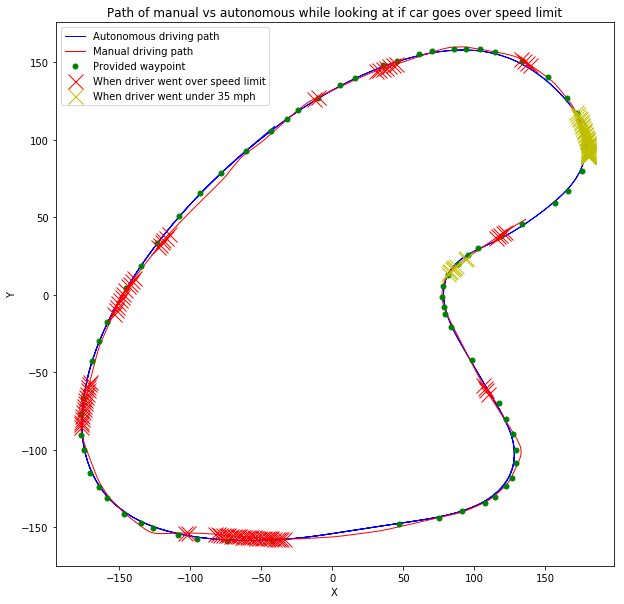

In [5]:
plt.rcParams["figure.figsize"] = [10, 10]
p1 = plt.plot(x_autoPath, y_autoPath, 'b', lw=1.0)
p2 = plt.plot(x_speedPath, y_speedPath, 'r', lw=1.0)
p3 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)
p4 = plt.plot(x_speed, y_speed, 'rx', ms=15.0)
p5 = plt.plot(x_low, y_low, 'yx', ms=15.0)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Path of manual vs autonomous while looking at if car goes over speed limit")

plt.legend((p1[0],p2[0], p3[0], p4[0], p5[0]), ('Autonomous driving path','Manual driving path', 'Provided waypoint', 'When driver went over speed limit', 'When driver went under 35 mph'))
plt.show()

In [8]:
#as we can see from the above graph, the manual driver stayed in the lane pretty well. However, they went over 
#the speed limit of 45 mph a lot. They also went under 35 mph along that second turn. Looking at the autonomous data, 
#it did not violate the speed limit once and also stayed above 35 mph the whole time. This concludes that the autonomous 
#software can drive better than a manual driver without violating the speed limit.

In [11]:
dfDistractedObstaclesLogger = pd.read_csv("../data/obstruction1_distracted_logger.csv")
dfObstaclesLogger = pd.read_csv("../data/obstruction1_logger.csv")

x_obstructionPath = []
y_obstructionPath = []
x_distractedPath = []
y_distractedPath = []

dfObstaclesLogger = dfObstaclesLogger[:len(dfDistractedObstaclesLogger)]
for i in range(0, len(dfObstaclesLogger) - 1): 
    x_obstructionPath.append(dfObstaclesLogger.loc[i, 'x'])
    y_obstructionPath.append(dfObstaclesLogger.loc[i, 'y'])
    x_distractedPath.append(dfDistractedObstaclesLogger.loc[i, 'x'])
    y_distractedPath.append(dfDistractedObstaclesLogger.loc[i, 'y'])

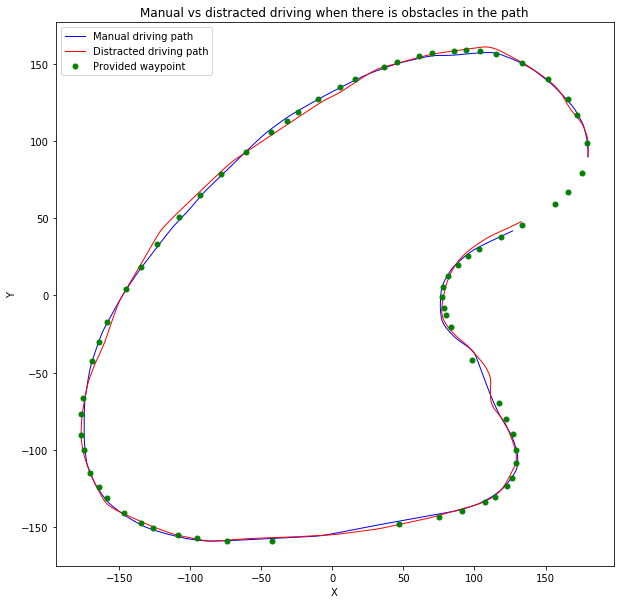

In [13]:
plt.rcParams["figure.figsize"] = [10, 10]
p1 = plt.plot(x_obstructionPath, y_obstructionPath, 'b', lw=1.0)
p2 = plt.plot(x_distractedPath, y_distractedPath, 'r', lw=1.0)
p3 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Manual vs distracted driving when there is obstacles in the path")

plt.legend((p1[0],p2[0], p3[0]), ('Manual driving path','Distracted driving path', 'Provided waypoint'))
plt.show()